In [78]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**1. Import Libraries**

In [79]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**2. Read Dataset**

In [80]:
df = pd.read_csv("topSubscribed.csv")
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


**3. Data Processing**

In [81]:
df.shape
df.dtypes


Rank                int64
Youtube Channel    object
Subscribers        object
Video Views        object
Video Count        object
Category           object
Started             int64
dtype: object

In [82]:

df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


*Delete some column that not related.*

In [83]:
df = df.drop(["Rank"], axis = 1 )
df.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


*Check missing values.*

In [84]:
df.isnull().sum()

Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

*Check unique data of Category column*

In [85]:
df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [86]:
df.groupby('Category')['Category'].count()

Category
Autos & Vehicles                                                                  1
Comedy                                                                           68
Education                                                                        45
Entertainment                                                                   238
Film & Animation                                                                 50
Gaming                                                                           94
Howto & Style                                                                    43
Movies                                                                            2
Music                                                                           217
News & Politics                                                                  27
Nonprofits & Activism                                                             2
People & Blogs                                                     

*Found 30 rows that are unknown category as an URL. Remove that unknown category*

In [87]:
df = df[df["Category"] != "https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels"]
df.Category.unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [88]:
df.shape

(970, 6)

30 rows have been removed

In [89]:
df.describe()

,Started
count,970.000000
mean,2012.470103
std,4.084964
min,1970.000000
25%,2010.000000
50%,2013.000000
75%,2015.000000
max,2021.000000


**4. Data Visualization**

**Percentage of Youtube Channel By Category**

In [90]:
categories=df['Category'].value_counts()
fig=px.pie(values=categories.values,
          names=categories.index,
          color_discrete_sequence=px.colors.sequential.RdBu,
          title="Percentage of Youtube Channel By Category", template='presentation'
          )
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.show();


*Entertainment, Music and People & Blogs are top 3 of category proportion*

**Video views and Subscribers By Categories**

In [91]:
df["Subscribers"] = df["Subscribers"].str.replace(",", "").astype(int)
df["Video Views"] = df["Video Views"].str.replace(",", "").astype(np.int64)
df["Video Count"] = df["Video Count"].str.replace(",", "").astype(int)


In [92]:
fig = px.scatter(df, x="Subscribers", y="Video Views",
                 size="Video Views", color="Category",
                 log_x=True, size_max=50,
                 title="Video views and Subscribers By Categories",
                 marginal_y='rug')
fig.show()

*Musics, Education and Shows ranked top 3 higest of Video Views and Subscribers.*

**Top 10 Music Youtube Channels with The Most Video Count**

In [93]:
df_music = df[df.Category == 'Music']
df_music.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,T-Series,234000000,212900271553,18515,Music,2006
12,Zee Music Company,91600000,53352597784,7530,Music,2014
18,BANGTANTV,73100000,19240057894,2090,Music,2012
19,Justin Bieber,70800000,29598652357,249,Music,2007
20,HYBE LABELS,69600000,25947702825,1070,Music,2008


Text(0.5, 1.0, 'Top 10 Music Youtube Channels with The Most Video Count')

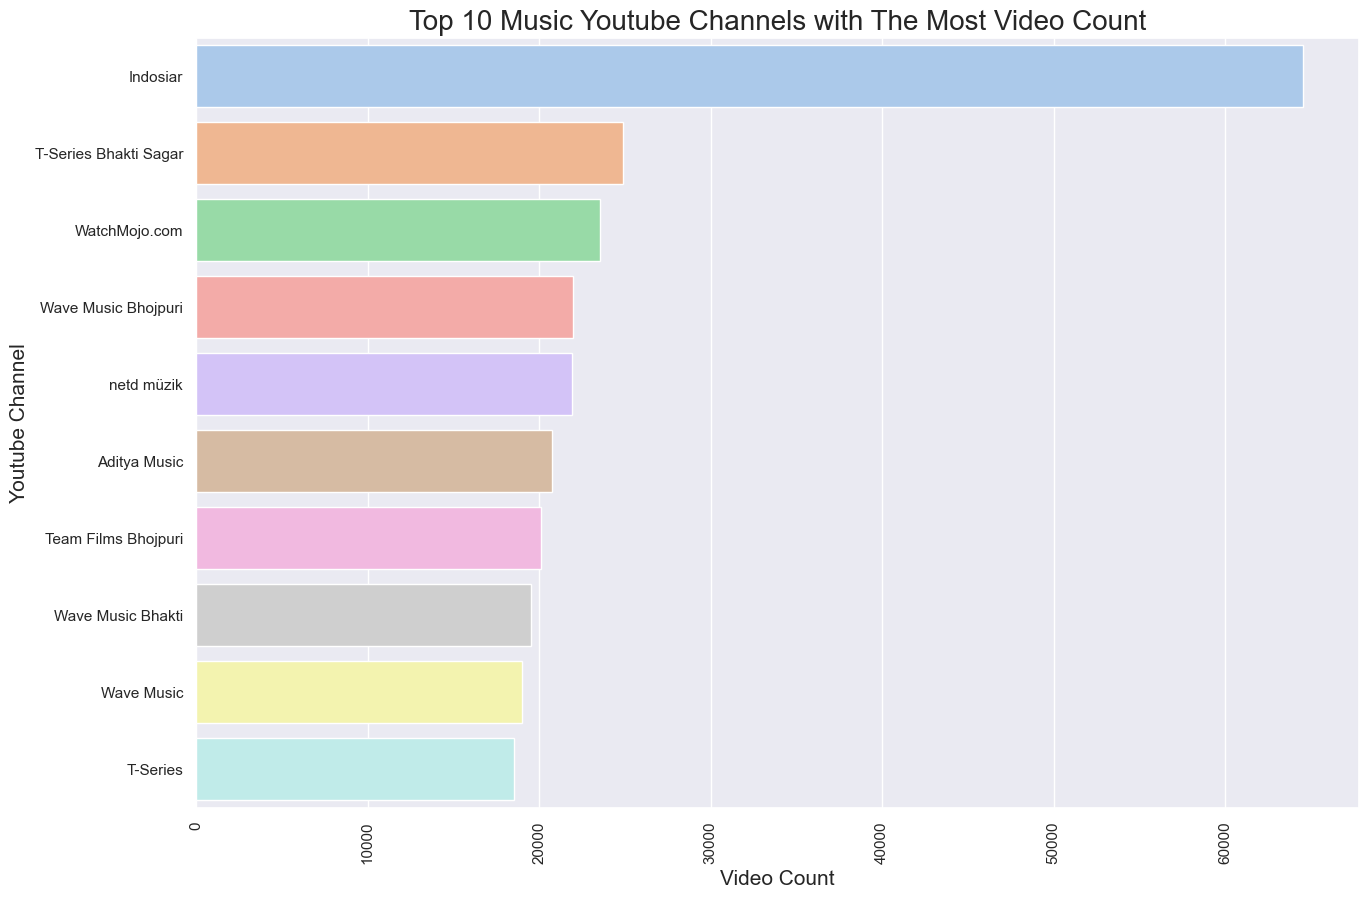

In [94]:
new_index = df_music["Video Count"].sort_values(ascending = False).index.values
sorted_df_music = df_music.reindex(new_index)
sorted_df_music_10 = sorted_df_music[:10]

plt.figure(figsize=(15,10))

sns.barplot(sorted_df_music_10, x="Video Count", y="Youtube Channel", palette = "pastel")

plt.xticks(rotation = 90)
plt.xlabel("Video Count", fontsize = 15)
plt.ylabel("Youtube Channel", fontsize = 15)
plt.title("Top 10 Music Youtube Channels with The Most Video Count", fontsize =20)

*Indosiar has the most video count of Music category*

**Top 10 Education Youtube Channels with The Most Video Views**

In [95]:
df_edu = df[df.Category == "Education"]
df_edu.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
2,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
23,Pinkfong Baby Shark - Kids' Songs & Stories,64600000,35934421688,2599,Education,2011
25,ChuChu TV Nursery Rhymes & Kids Songs,61100000,41904239949,531,Education,2013
42,BillionSurpriseToys - English Kids Songs & Car...,49700000,8662901485,637,Education,2013
43,Infobells - Hindi,48400000,27621598218,514,Education,2014


Text(0.5, 1.0, 'Top 10 Education Youtube Channels with The Most Video Views')

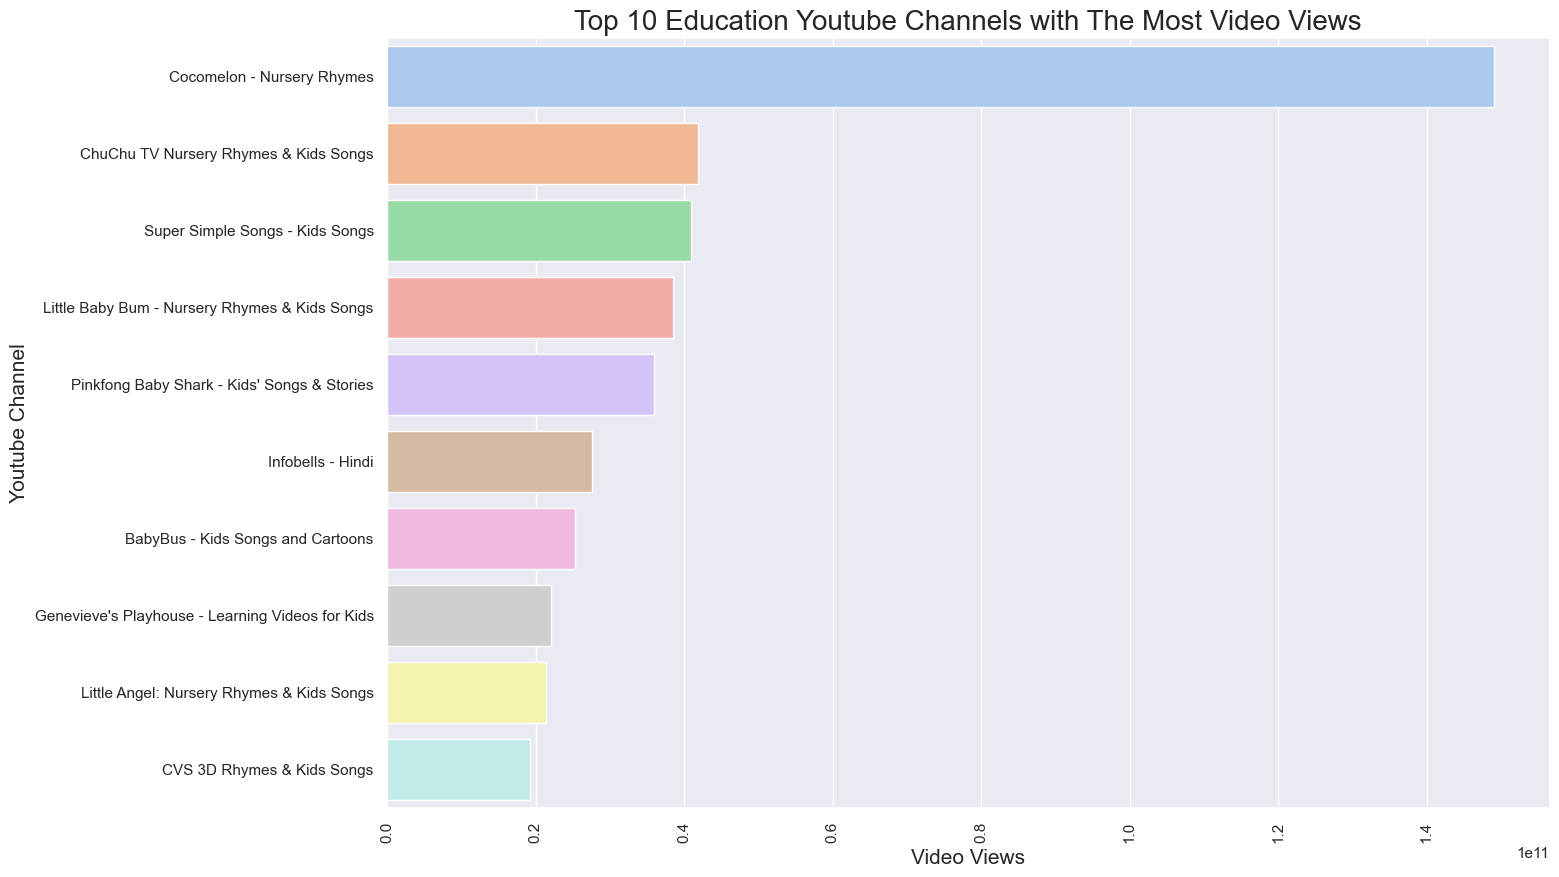

In [96]:
new_index2 = df_edu["Video Views"].sort_values(ascending = False).index.values
sorted_df_edu = df_edu.reindex(new_index2)
sorted_df_edu_10 = sorted_df_edu[:10]

plt.figure(figsize=(15,10))

sns.barplot(sorted_df_edu_10, x="Video Views", y="Youtube Channel", palette = "pastel")

plt.xticks(rotation = 90)
plt.xlabel("Video Views", fontsize = 15)
plt.ylabel("Youtube Channel", fontsize = 15)
plt.title("Top 10 Education Youtube Channels with The Most Video Views", fontsize =20)

*Cocomelon has the most video view of Education category*

**Trend in the YouTube Channels Created Each Year**

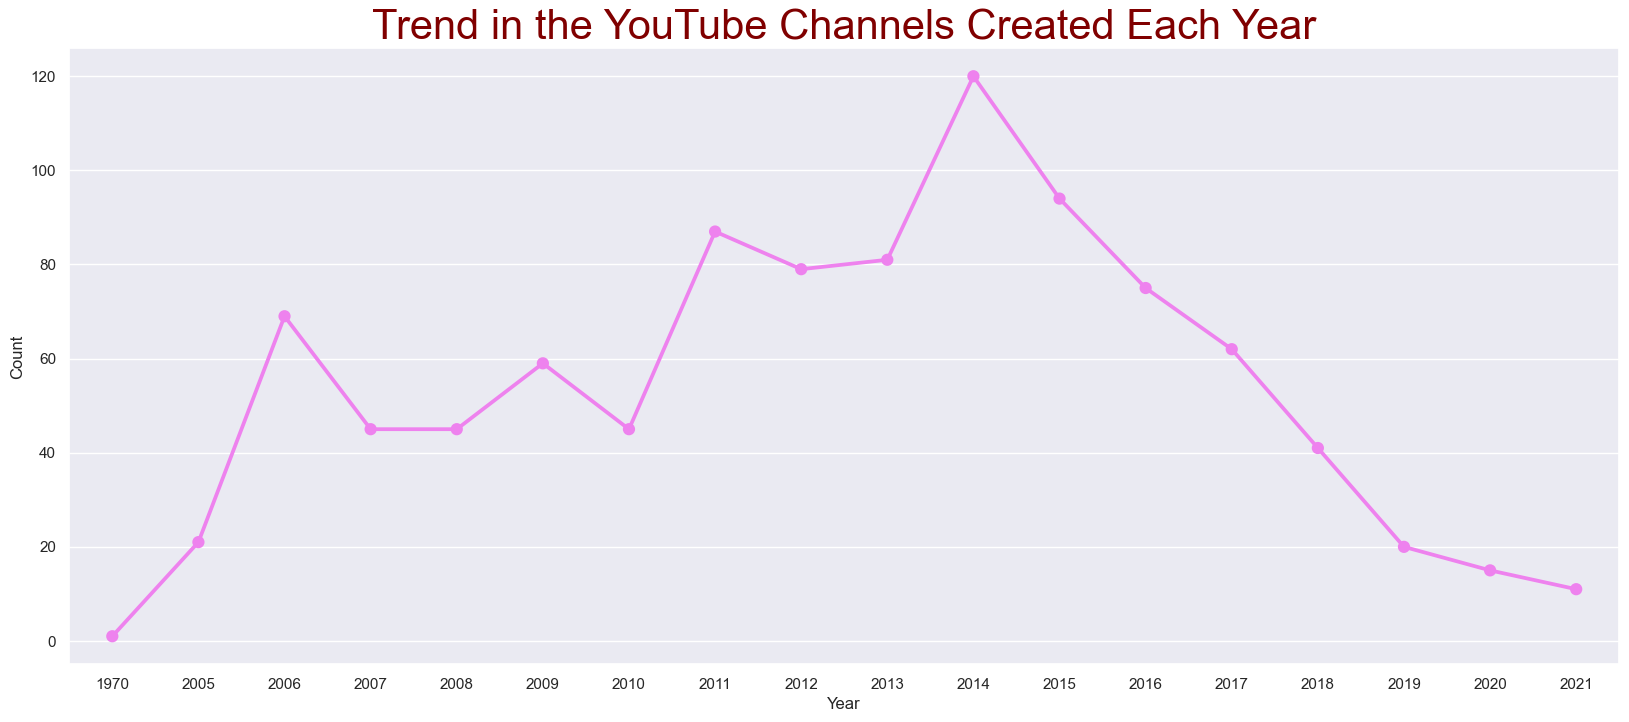

In [97]:
year=df['Started'].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index,y=year.values, color='violet')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend in the YouTube Channels Created Each Year',size=30, color='maroon');


*The maximum number of the Youtube Channels was in 2014 and then kept decreasing since then*

**Correlation between variables**

<Axes: xlabel='Subscribers', ylabel='Video Views'>

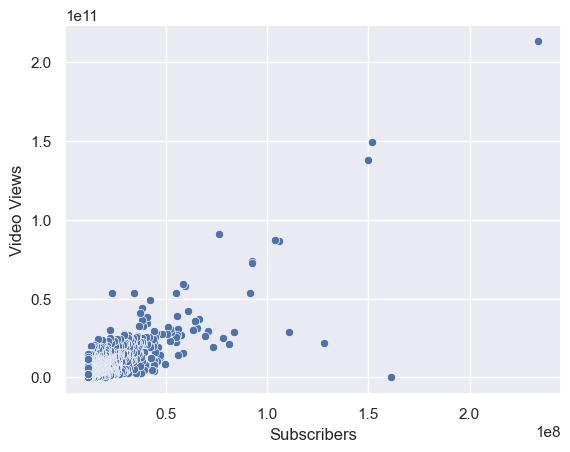

In [98]:
sns.scatterplot(data=df, x='Subscribers', y='Video Views')

<Axes: xlabel='Subscribers', ylabel='Video Count'>

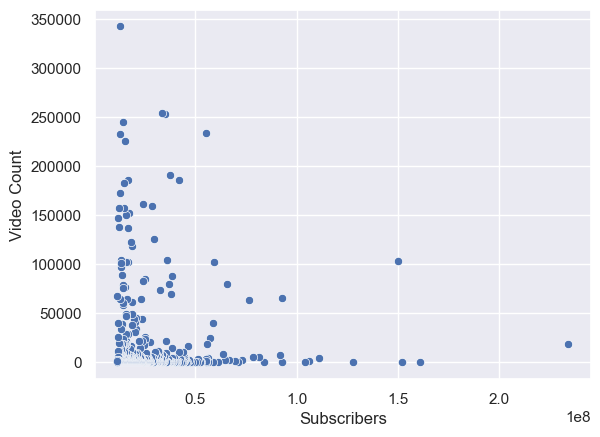

In [99]:
sns.scatterplot(data=df, x='Subscribers', y='Video Count')

<Axes: xlabel='Video Views', ylabel='Video Count'>

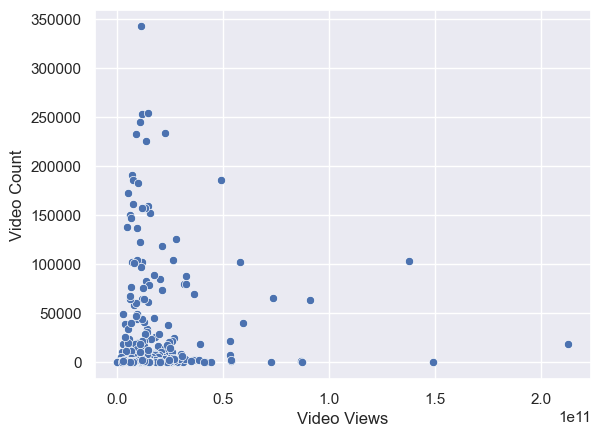

In [100]:
sns.scatterplot(data=df, x='Video Views', y='Video Count')

**The heat map explains the correlation**

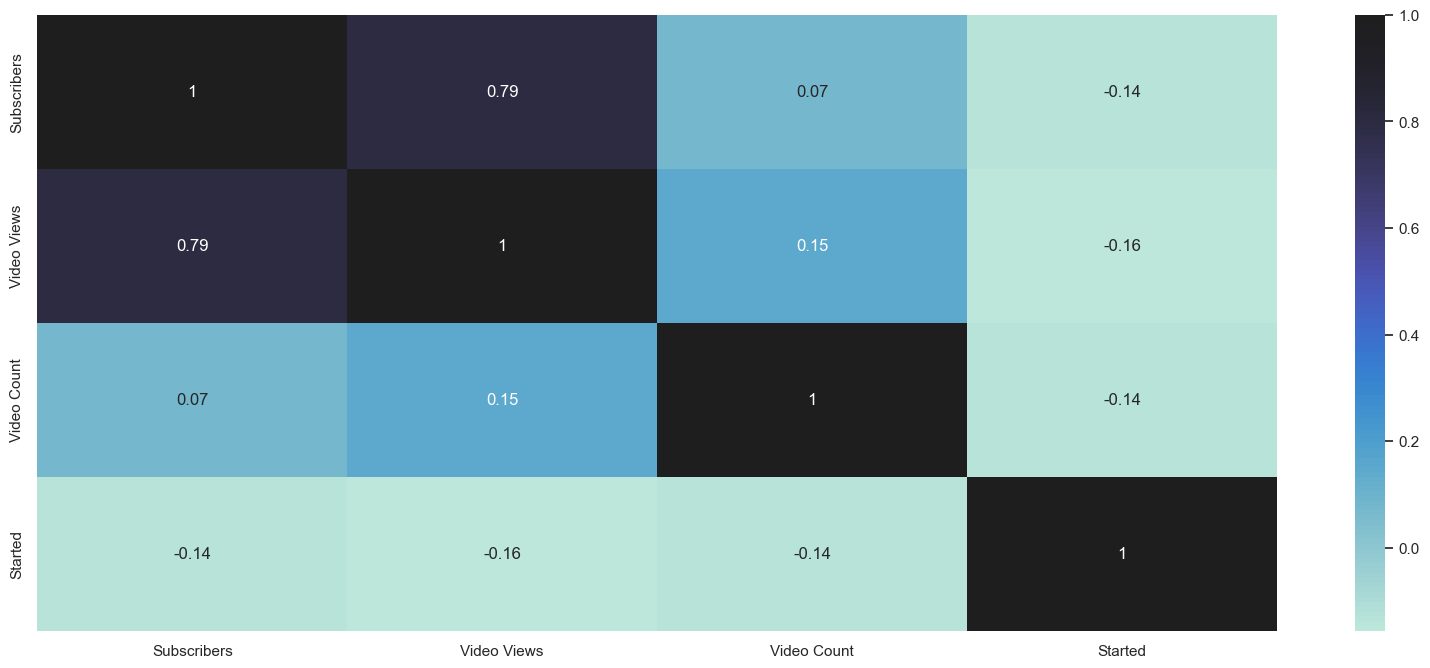

In [101]:
plt.figure(figsize=(20,8))
sns.set_theme('notebook')
sns.heatmap(df.corr(numeric_only=True), annot=True, center=True);